In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [2]:
opsim_file = get_baseline()
runName = os.path.split(opsim_file)[-1].replace('.db', '')

outDir = 'test_agn'
resultsDb = maf.ResultsDb(outDir)

In [3]:
# Position of Carina nebula
ra=[161.264583]
dec=[-59.68445833]

bundle_list = []

slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
# Could run over multiple filters, let's start with i
sql = 'filter="i"'
metric = maf.metrics.SFUncertMetric(metricName='yso_sf_uncert', dust=False, mag=22)
bundle_list.append(maf.MetricBundle(metric, slicer, sql, runName=runName))

metric=maf.metrics.CountMetric(col='night')
bundle_list.append(maf.MetricBundle(metric, slicer, sql, runName=runName))


Querying table None with constraint filter="i" for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldRA', 'fieldDec', 'rotSkyPos', 'night']
Found 473684 visits
Running:  ['baseline_v2_0_10yrs_yso_sf_uncert_i_USER', 'baseline_v2_0_10yrs_Count_night_i_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:139: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:139: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(


Plotting complete.


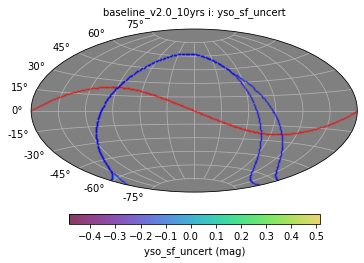

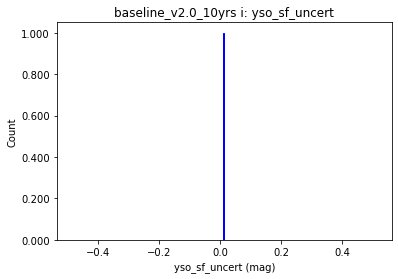

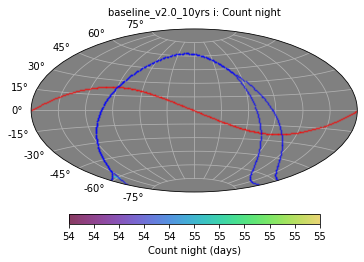

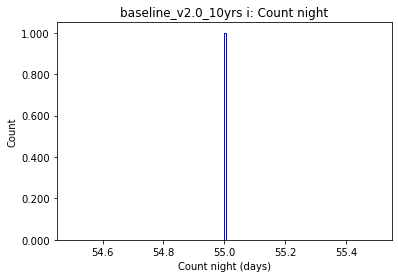

In [4]:
bd = maf.makeBundlesDictFromList(bundle_list)
g = maf.MetricBundleGroup(bd, opsim_file, outDir=outDir, resultsDb=resultsDb)
g.runAll()
g.plotAll(closefigs=False)

In [5]:
bundle_list[0].metricValues, bundle_list[1].metricValues

(masked_array(data=[0.013543464663988867],
              mask=[False],
        fill_value=-666.0),
 masked_array(data=[55.0],
              mask=[False],
        fill_value=-666.0))

Querying table None with constraint filter="i" for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldRA', 'fieldDec', 'rotSkyPos', 'night']
Found 467929 visits
Running:  ['baseline_v2_0_10yrs_yso_sf_uncert_i_USER', 'baseline_v2_0_10yrs_Count_night_i_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="i"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:139: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:139: RuntimeWarning: invalid value encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:153: UserWarning: Optimal bin calculation calculated NaN: returning 200
  warnings.warn(


Plotting complete.
[0.005043486318363899] [556.0]


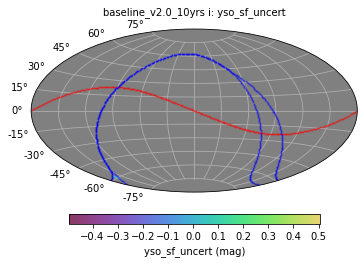

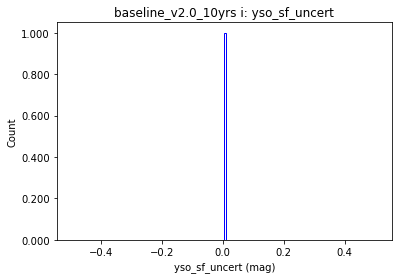

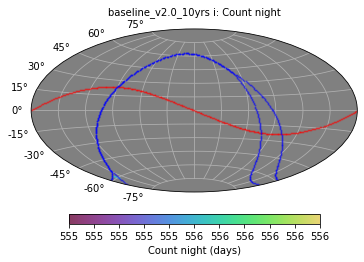

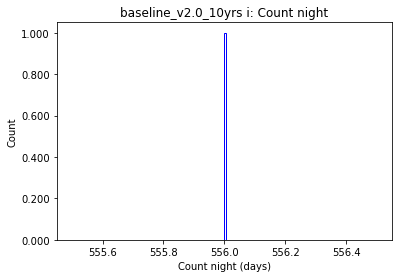

In [6]:
# ok, now let's try again with the carina db
opsim_file='/Users/yoachim/runs2/microsurveys/carina/carina_v2.0_10yrs.db'

g = maf.MetricBundleGroup(bd, opsim_file, outDir=outDir, resultsDb=resultsDb)
g.runAll()
g.plotAll(closefigs=False)
print(bundle_list[0].metricValues, bundle_list[1].metricValues)
